## Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
# load data
df = pd.read_csv("data/train/aligned_well_01.csv") 

In [2]:
df.head()

,DEPT,GR,RHOB,NPHI,RD
0,411.0,94.007,2.2421,0.4708,310.513
1,411.5,95.009,2.2631,0.4757,726.138
2,412.0,96.101,2.2757,0.4510,975.639
3,412.5,95.683,2.2726,0.4282,975.639
4,413.0,93.025,2.2764,0.4085,975.639


Text(0, 0.5, 'Neutron')

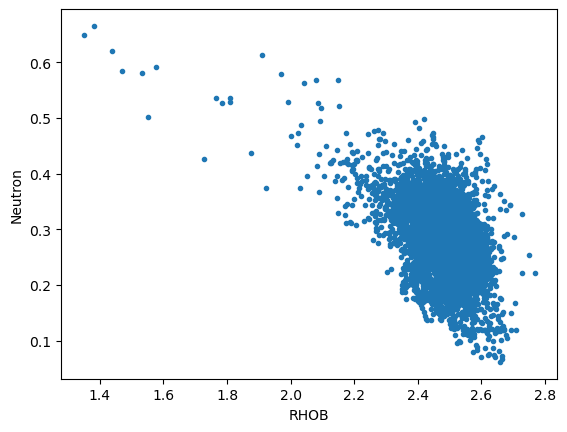

In [190]:
# Quick visualization
plt.plot(df.RHOB, df.NPHI,'.')
plt.xlabel('RHOB')
plt.ylabel('Neutron')

## Preprocessing - Normalizatio/standardization

In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [192]:
import seaborn as sns

In [193]:
X = df.RHOB.values
y = df.NPHI.values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [194]:
# Instanciation 
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# fit to data
X_scaler.fit(X)
y_scaler.fit(y)

# Transform data to normalized value
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

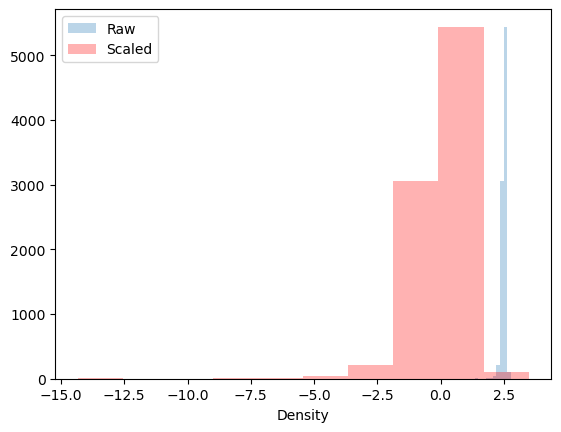

In [195]:
plt.hist(X, label = 'Raw', alpha  = 0.3)
plt.hist(X_scaled , label = 'Scaled', color = 'r', alpha  = 0.3)
plt.xlabel('Density')
plt.legend()

## Training / test data splition

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, 
                                                                                y_scaled, 
                                                                                test_size = 0.3, 
                                                                                random_state = 77777)


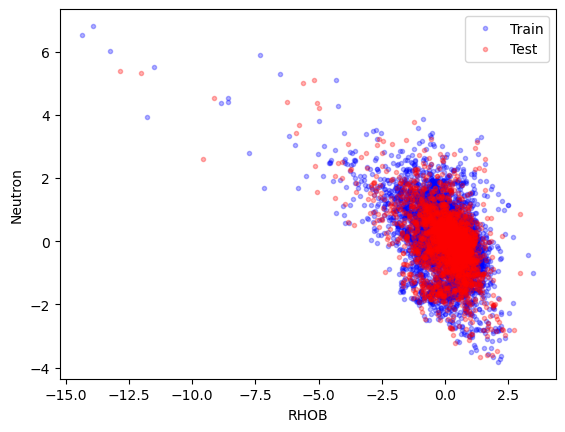

In [198]:
plt.plot(X_scaled_train, y_scaled_train,'b.', alpha = 0.3, label ='Train')
plt.plot(X_scaled_test, y_scaled_test,'r.', alpha = 0.3, label = 'Test')
plt.xlabel('RHOB')
plt.ylabel('Neutron')
plt.legend()

## Linear Regression

In [199]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [200]:
# instanciation
regressor = LinearRegression()

In [201]:
# Training/fit to data
regressor.fit(X_scaled_train, y_scaled_train)

LinearRegression()

In [202]:
# Prediction
y_scaled_predict_train = regressor.predict(X_scaled_train)
y_scaled_predict_test  = regressor.predict(X_scaled_test)

Text(0.5, 1.0, 'Accuracy plot, R2 = 0.2309')

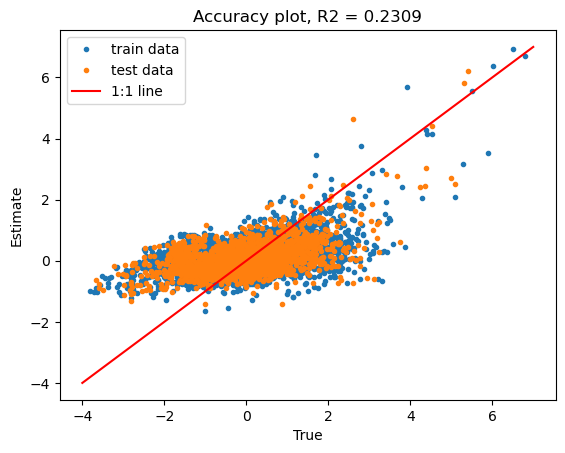

In [203]:
plt.plot(y_scaled_train, y_scaled_predict_train, '.', label = 'train data')
plt.plot(y_scaled_test, y_scaled_predict_test, '.', label = 'test data')
plt.plot([-4,7],[-4,7], '-r', label = '1:1 line')
plt.xlabel('True')
plt.ylabel('Estimate')
plt.legend()
plt.title(f"Accuracy plot, R2 = {r2_score(y_scaled_train, y_scaled_predict_train):.4f}")


In [204]:
X_dummy = np.array([-15,3]).reshape(-1,1)
y_dummy = regressor.predict(X_dummpy)

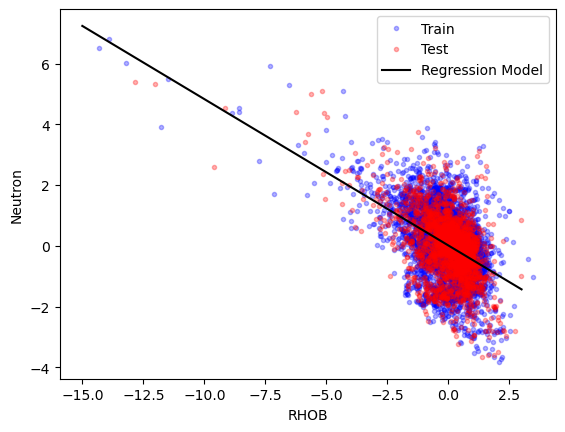

In [205]:
plt.plot(X_scaled_train, y_scaled_train,'b.', alpha = 0.3, label ='Train')
plt.plot(X_scaled_test, y_scaled_test,'r.', alpha = 0.3, label = 'Test')
plt.plot(X_dummy, y_dummy, 'k-', label='Regression Model')
plt.xlabel('RHOB')
plt.ylabel('Neutron')
plt.legend()

## Other ML models

In [40]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [20]:
# instanciation
regressors = [Ridge(),
              KNeighborsRegressor(), 
              DecisionTreeRegressor(),
              SVR(),]
titles = ['Ridge', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR']

C:\Users\INHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


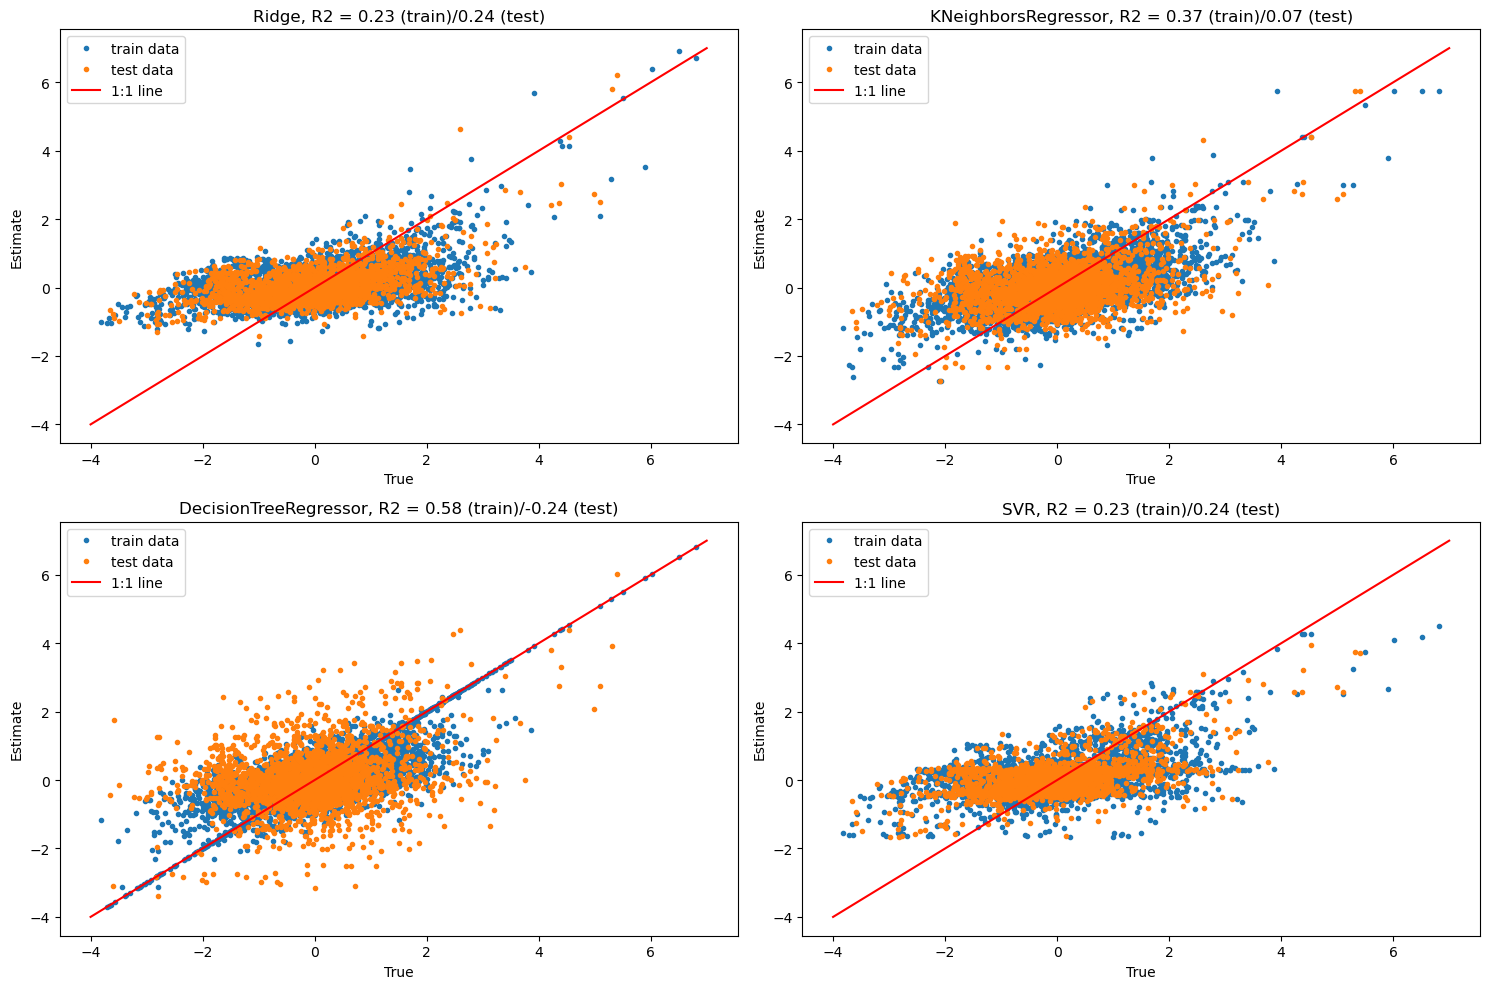

In [210]:
plt.figure(figsize = (15,10))
for i, regressor in enumerate(regressors):
    
    # Training/fit to data
    regressor.fit(X_scaled_train, y_scaled_train)
    
    # Prediction
    y_scaled_predict_train = regressor.predict(X_scaled_train)
    y_scaled_predict_test  = regressor.predict(X_scaled_test)
    
    # Accuracy plot visulization 
    plt.subplot(2,2,i+1)
    plt.plot(y_scaled_train, y_scaled_predict_train, '.', label = 'train data')
    plt.plot(y_scaled_test, y_scaled_predict_test, '.', label = 'test data')
    plt.plot([-4,7],[-4,7], '-r', label = '1:1 line')
    plt.xlabel('True')
    plt.ylabel('Estimate')
    plt.legend()
    plt.title(f"{titles[i]}, R2 = {r2_score(y_scaled_train, y_scaled_predict_train):.2f} (train)/{r2_score(y_scaled_test,y_scaled_predict_test):.2f} (test)")

plt.tight_layout()